In [96]:
import pandas as pd
import itertools
from collections import defaultdict
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
plt.rcParams['figure.dpi'] = 512

In [194]:
months = list(range(3, 9))
buffers = [20, 10]
sheet_names = [f"{buffer}km-{str(month).zfill(2)}" for buffer, month in itertools.product(buffers, months)]
data_file = "Data-All.xlsx"
sheet_name = ""

dfs = []
for buffer in buffers:
    for month in months:
        sheet_name = f"{buffer}km-{str(month).zfill(2)}"
        df = pd.read_excel("Data-All.xlsx", sheet_name=sheet_name, index_col="RecordID")
        df["buffer"] = buffer
        df["month"] = month
        dfs.append(df)

In [195]:
df = pd.concat(dfs)

In [196]:
weird_year_cols = [x for x in df if x.startswith("2003") or x.startswith("2004")]
df = df[df.columns.difference(weird_year_cols)]
df=df.reset_index()
df.LONG = round(df.LONG, 1)
df.LAT = round(df.LAT, 1)

In [197]:
melted = []
keys = ["mean", "median", "stdev", "min", "max"]
for key in keys:
    columns = sorted([x for x in df.columns if x.endswith(f"_{key}")])
    tmp = pd.melt(
        df, 
        id_vars=["RecordID", "Country", "County", "LAT", "LONG", "month", "buffer"], 
        value_vars=columns,
        var_name="variable", 
        value_name=key
    )
    tmp["year"] = tmp["variable"].str[:2].astype(int)
    tmp = tmp.drop("variable", axis=1)
    melted.append(tmp.set_index(["RecordID", "month", "year"]))

In [198]:
tmp = melted[0]
for key, df_ in zip(keys[1:], melted[1:]):
    tmp[key] = df_[key]

In [199]:
df = tmp.dropna().reset_index()

In [200]:
df[(df.year==3) & (df.month==3) & (df.Country=="England") & (df.LONG>-3)]

,RecordID,month,year,Country,County,LAT,LONG,buffer,mean,median,stdev,min,max
341,83224,3,3,England,Northumberland,55.6,-1.6,20,6.667402,6.6450,0.112725,6.470,6.895000
342,31265,3,3,England,Northumberland,55.3,-1.5,20,6.869561,6.8700,0.094136,6.660,7.095000
385,4022,3,3,England,Dorset,50.5,-2.5,20,8.169477,8.1500,0.280033,7.685,8.570000
386,81111,3,3,England,Dorset,50.6,-2.1,20,7.922625,7.8400,0.309564,7.475,8.554999
387,5372,3,3,England,North Yorkshire,54.2,-0.3,20,7.013085,7.0150,0.112772,6.700,7.240000
388,5379,3,3,England,North Yorkshire,54.2,-0.3,20,7.017604,7.0225,0.113109,6.700,7.240000
389,5385,3,3,England,North Yorkshire,54.2,-0.3,20,7.033673,7.0450,0.119842,6.700,7.270000
390,5396,3,3,England,North Yorkshire,54.2,-0.2,20,6.968523,7.0000,0.147033,6.625,7.270000
391,4637,3,3,England,Humberside,54.2,-0.2,20,6.965510,7.0000,0.149926,6.615,7.270000
392,4497,3,3,England,Humberside,54.2,-0.2,20,6.965283,6.9900,0.148764,6.615,7.270000


In [29]:
df.describe()

,LAT,LONG,buffer,mean,median,stdev,min,max
count,88574.000000,88574.000000,88574.000000,88574.000000,88574.000000,88574.000000,88574.000000,88574.000000
mean,57.915375,-3.401253,14.954727,10.546165,10.539024,0.264052,10.002514,11.088748
std,2.707752,2.423859,4.999823,2.697449,2.690851,0.196131,2.605162,2.888126
min,49.900000,-8.600000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.900000,-4.900000,10.000000,8.260000,8.264999,0.143452,7.865000,8.650000
50%,58.600000,-3.000000,10.000000,10.327727,10.305000,0.216588,9.764999,10.885000
75%,60.100000,-1.300000,20.000000,12.730973,12.710000,0.328216,12.130000,13.365000
max,60.800000,-0.100000,20.000000,26.599998,26.599998,6.983477,26.599998,29.264999


In [46]:
df["Year-Range"] = df.year.between(3, 12).replace({True: "03-12", False: "13-21"})

In [426]:
df.groupby(["LONG", "LAT", "year"]).mean().reset_index()

,LONG,LAT,year,mean,median,stdev,min,max
0,-8.634826,57.828738,3,12.181277,12.161364,0.203547,11.740000,12.562272
1,-8.634826,57.828738,4,11.875008,11.895909,0.211119,11.361363,12.285909
2,-8.634826,57.828738,5,10.986658,10.970833,0.217082,10.489583,11.429166
3,-8.634826,57.828738,6,11.261037,11.261458,0.198955,10.774583,11.712083
4,-8.634826,57.828738,7,11.614321,11.596666,0.192852,11.161250,12.056250
...,...,...,...,...,...,...,...,...
6778,-0.077642,54.113745,17,11.531869,11.506041,0.284208,10.976250,12.321666
6779,-0.077642,54.113745,18,10.681340,10.664375,0.349924,10.027500,11.517916
6780,-0.077642,54.113745,19,11.592593,11.592708,0.300606,10.595909,12.292500
6781,-0.077642,54.113745,20,11.384414,11.349583,0.342399,10.597500,12.396667


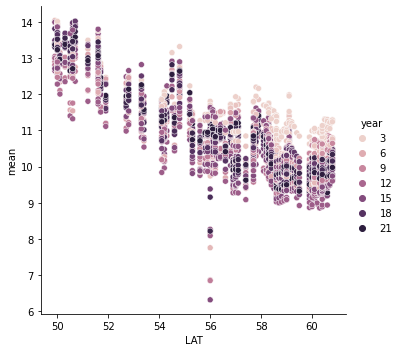

In [51]:
sns.relplot(data=df.groupby(["LONG", "LAT", "year"]).mean().reset_index(), x="LAT", y="mean", hue="year")

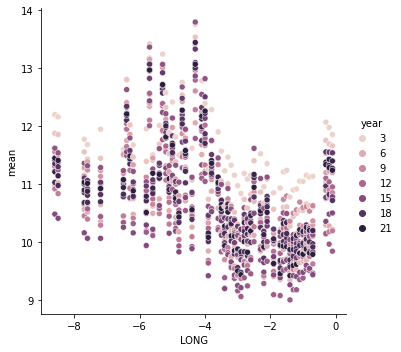

In [52]:
sns.relplot(data=df.groupby(["LONG", "year"]).mean().reset_index(), x="LONG", y="mean", hue="year")

<AxesSubplot:xlabel='LONG', ylabel='mean'>

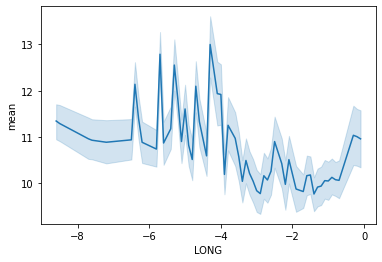

In [58]:
sns.lineplot(data=df.groupby(["LONG", "year", "month"]).mean(), x="LONG", y="mean")

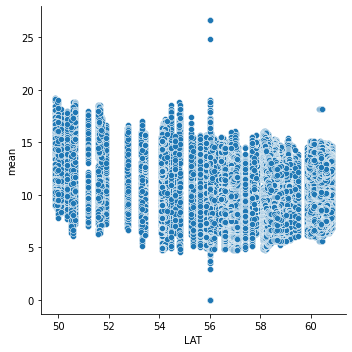

In [440]:
sns.relplot(data=df, x="LAT", y="mean")

In [430]:
df[["LAT", "LONG", "mean"]].corr()

,LAT,LONG,mean
LAT,1.000000,0.413405,-0.270736
LONG,0.413405,1.000000,-0.184470
mean,-0.270736,-0.184470,1.000000


In [456]:
df.groupby(["buffer"]).mean()

,LAT,LONG,mean,median,stdev,min,max
buffer,,,,,,,
10,57.917775,-3.400232,10.397162,10.393568,0.264476,9.849337,10.930913
20,57.917950,-3.400233,10.697890,10.687139,0.263619,10.158491,11.249468


<AxesSubplot:xlabel='LONG', ylabel='mean'>

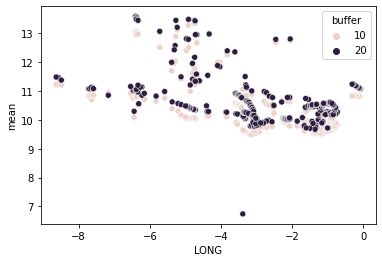

In [455]:
sns.scatterplot(data=df.groupby(["buffer", "LAT"]).mean(), x="LONG", y="mean", hue="buffer")

<AxesSubplot:xlabel='month', ylabel='mean'>

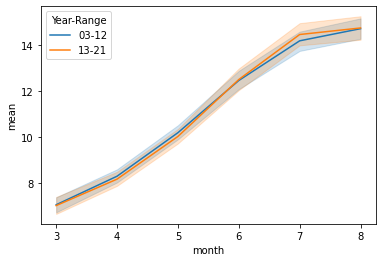

In [50]:
sns.lineplot(data=df.groupby(["County", "Year-Range", "month"]).mean(), x="month", y="mean", hue="Year-Range")

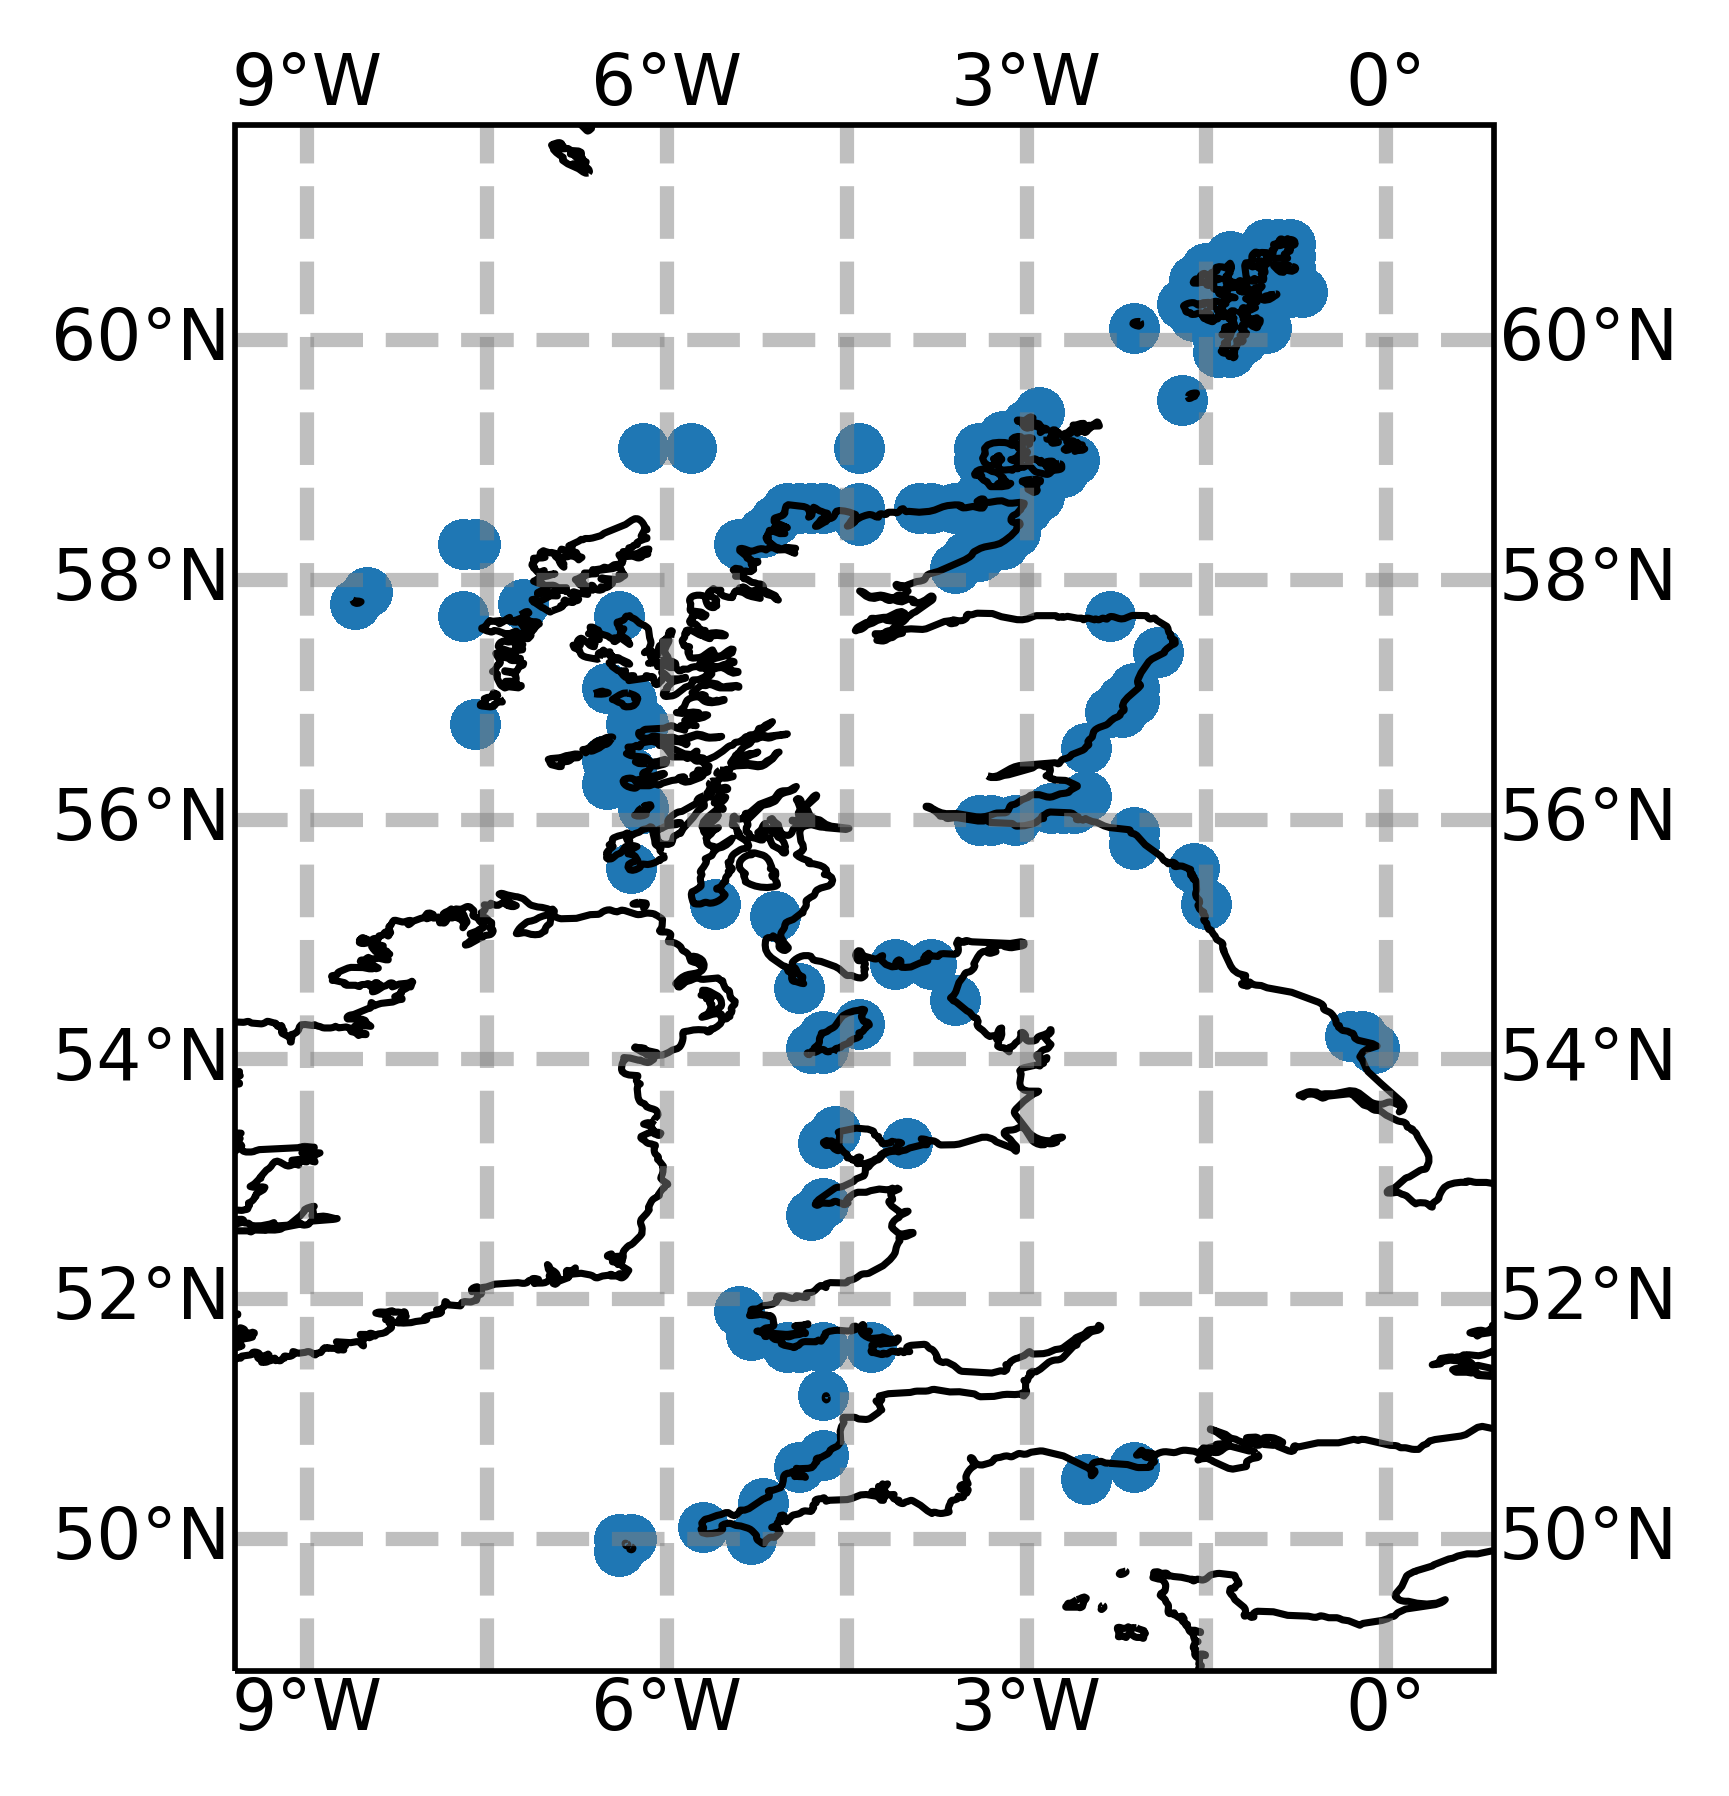

In [101]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axis()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.scatter(df.LONG, df.LAT)
ax.coastlines()
ax.set_extent([df.LONG.min()-1, df.LONG.max()+1, df.LAT.min()-1, df.LAT.max()+1])

<AxesSubplot:xlabel='LONG', ylabel='LAT'>

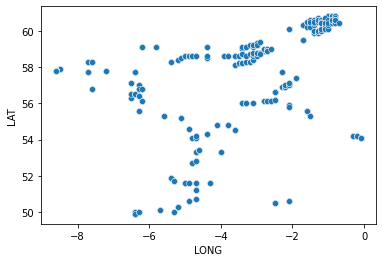

In [77]:
sns.scatterplot(data=df, x="LONG", y="LAT")

In [75]:
df["LAT"]

0        60.7
1        60.7
2        60.7
3        60.7
4        60.7
         ... 
88569    54.1
88570    54.1
88571    54.1
88572    54.1
88573    54.1
Name: LAT, Length: 88574, dtype: float64

C:\Users\mclea\AppData\Local\Temp/ipykernel_31880/1728249784.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group"][(df.Country=="England") & (df.LONG < east_west_split)] = "England, West"
C:\Users\mclea\AppData\Local\Temp/ipykernel_31880/1728249784.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["group"][(df.Country=="England") & (df.LONG > east_west_split)] = "England, East"
C:\Users\mclea\AppData\Local\Temp/ipykernel_31880/1728249784.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

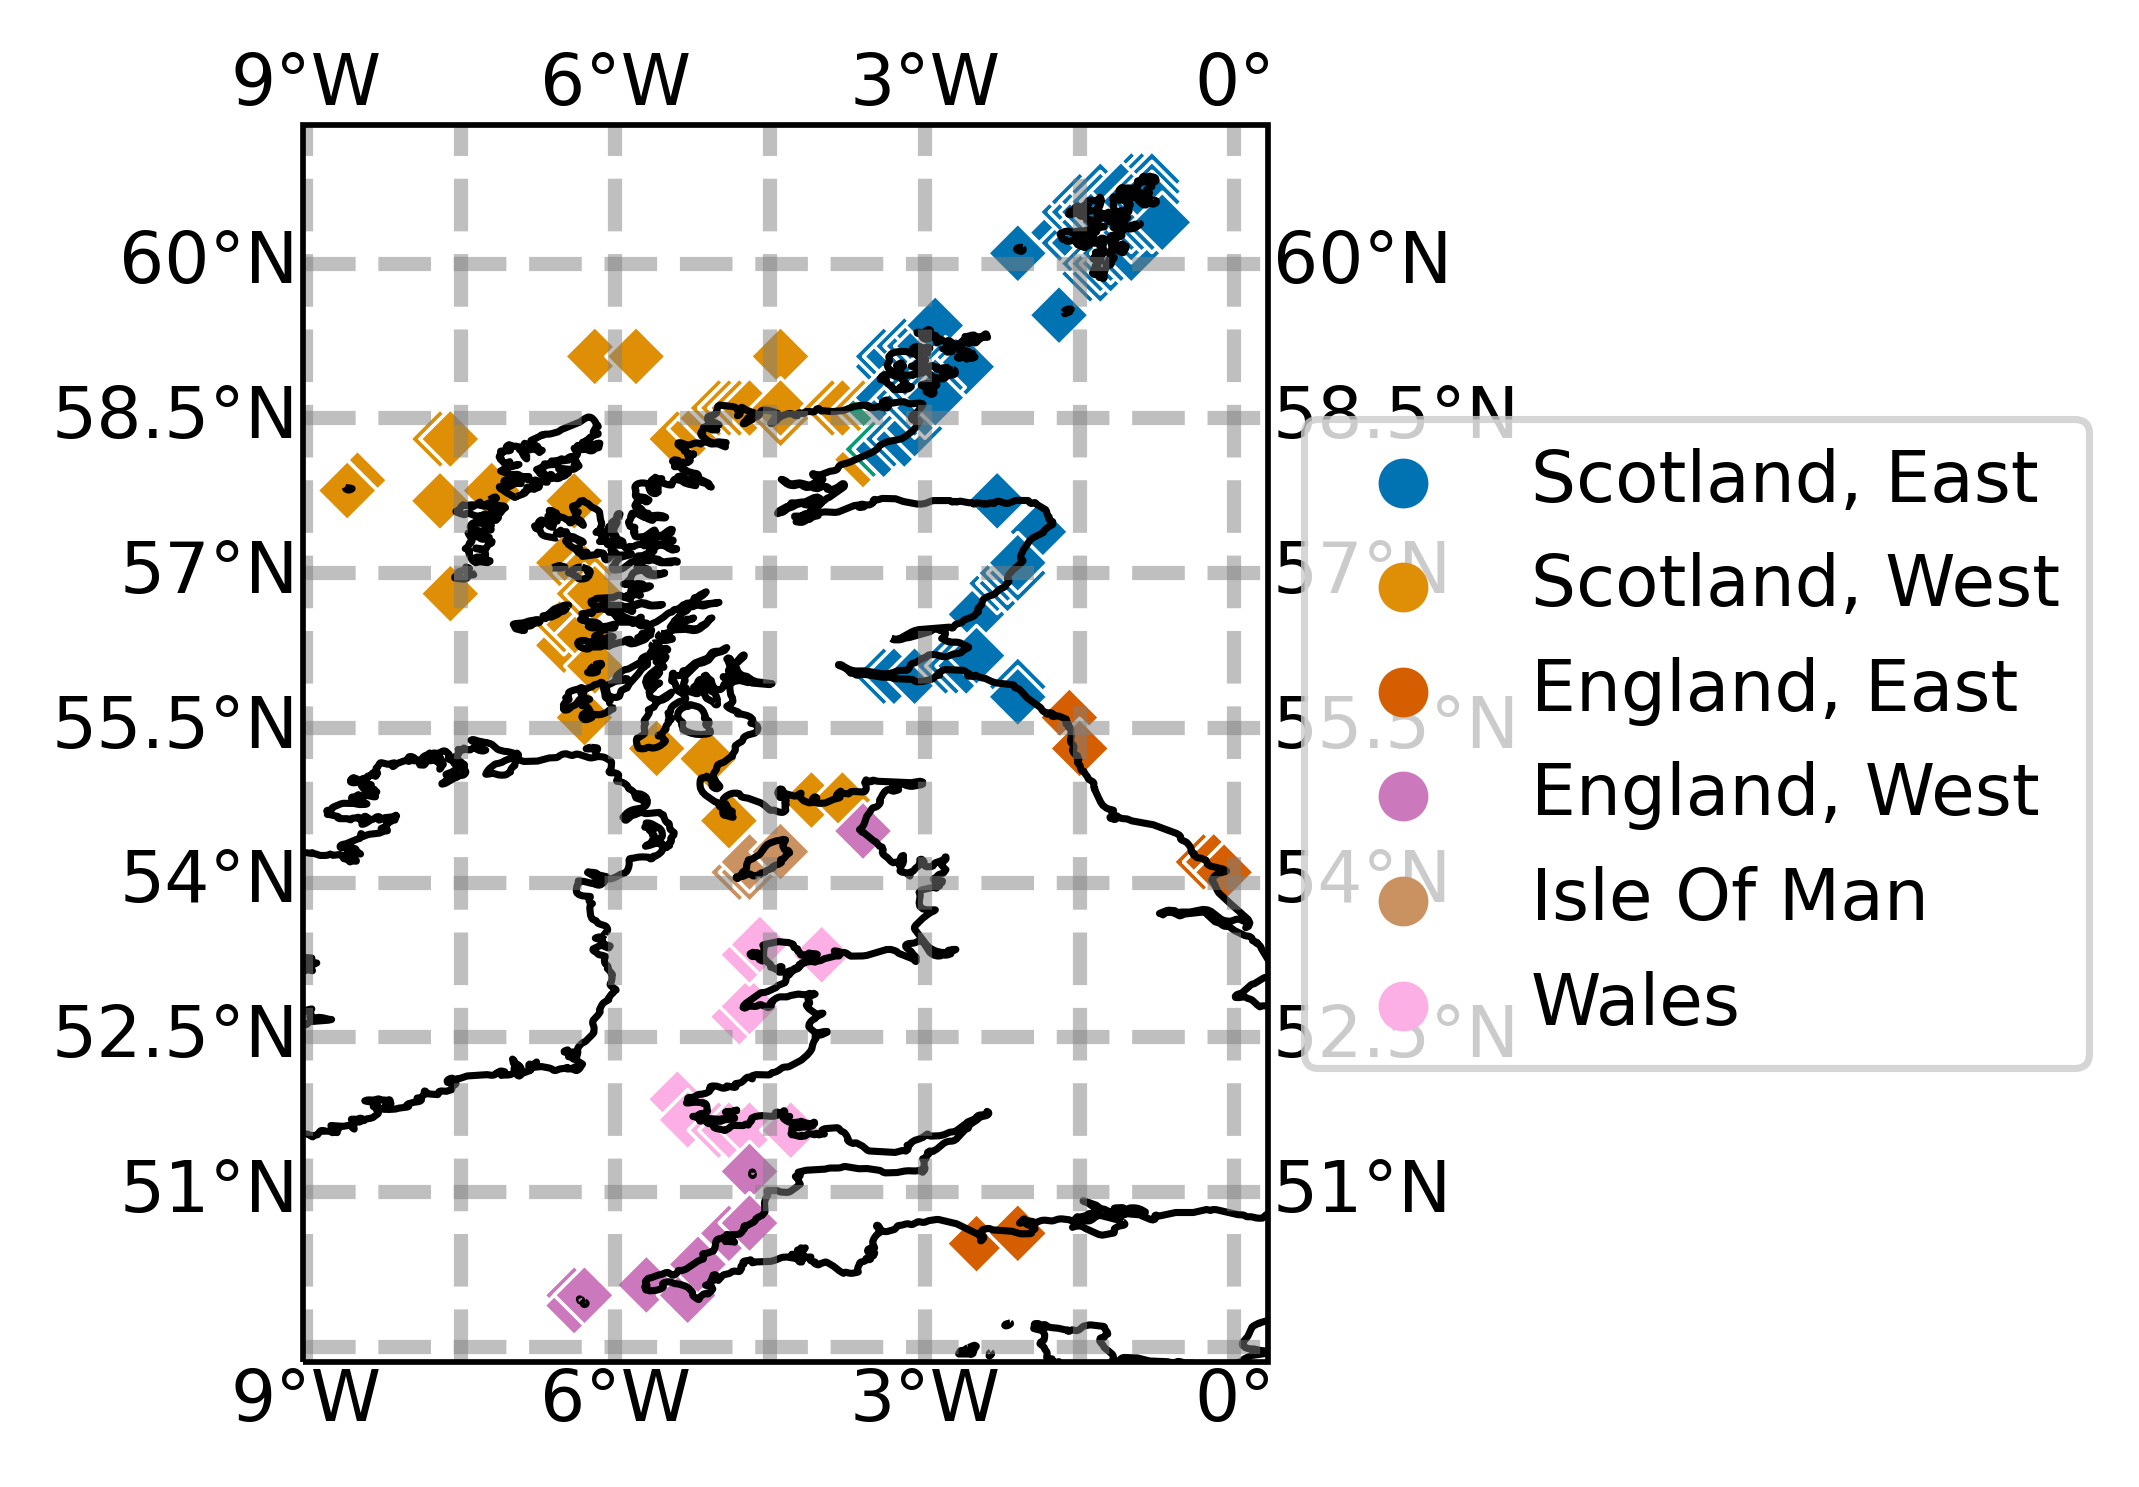

In [201]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

df["group"] = ""
east_west_split = -3.5
north_south_split = 54

df["group"][(df.Country=="England") & (df.LONG < east_west_split)] = "England, West"
df["group"][(df.Country=="England") & (df.LONG > east_west_split)] = "England, East"
df["group"][(df.Country=="Wales")] = "Wales"
df["group"][(df.Country=="Scotland") & (df.LONG < east_west_split)] = "Scotland, West"
df["group"][(df.Country=="Scotland") & (df.LONG > east_west_split)] = "Scotland, East"
df["group"][(df.Country=='Isle Of Man')] = 'Isle Of Man'

# df["east_west"] = pd.cut(df.LONG, bins=[-10, -3.5, 0])
# df["north_south"] = pd.cut(df.LAT, bins=[-90, 54  , 90])
# df["quadrent"] = df.east_west.astype(str) + df.north_south.astype(str)
# df["country_quadrent"] = df.quadrent + df.Country
ax.coastlines()
sns.scatterplot(x='LONG', y='LAT', data=df, 
                marker='D', palette='colorblind', cmap='RdBu', ax=ax, hue="group")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [203]:
df[["group", "buffer", "Country", "County", "year", "month", "LAT", "LONG", "mean", "median", "stdev", "min", "max", "RecordID"]].groupby("group").apply(lambda df: df.to_csv(f"{df.name}.csv"))

""
